# 8. K-means clustering

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
rcParams['figure.figsize'] = (7, 7)
font = {'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
from IPython.core.display import HTML
css_file = '../my.css'
HTML(open(css_file, "r").read())

So far we have seen learning algorithms for **supervised data analysis**, i.e. the data was labeled. However, as labeling data can be hard and/or costly (both in time and money) most data that is colected is unlabeled. Learning from unlabeled data is known as **unsupervised learning**. In this we look for hidden **structure** in the data that can learn us something bout the true model(s) that generated the data. 

Clustering is a class of unsupervised learning methods that associates observations according to some specified measure of similarity (e.g. Euclidean distance). In its basic form (many variations exist) it tries to cluster the unlabeled data points into groups such that data points in the same group (**cluster**) are more similar to each other than those in other groups.

The K-means clustering algorithm associates each point $x_i$ in a data set ($i=1 \ldots n$) to $K$ clusters. Each cluster is specified by a **centroid** that is the average location of all the points in the cluster. The algorithm proceeds iteratively from arbitrary centroid locations, updating the membership of each point according to minimum distance and then updating the centroid location based on the new cluster membership. 

The algorithm converges when the assignment of points to centroids does not change anymore with each iteration.

We can formulize this as follows:

1. Initialize cluster centroids (e.g. *at random*):

    $$\mu^{(0)}_1, \ldots, \mu^{(0)}_k \in \mathbb{R}^n$$

2. Iterate steps ($s$) until converged:

    a. For each data point $x_i$ find the closest centroid 
    
    $$c_i = \text{argmin}_j || x_i - \mu_j^{(s)} ||$$
    
    b. Update the centroids as
    
    $$\mu_j^{(s+1)} = \frac{\sum_{i=1}^n I[c_i = j] x_i}{\sum_{i=1}^n I[c_i = j]}$$
    
    where $I[c_i = j]$ equals 1 if $c_i$ equals $j$ and 0 otherwise.

Let's show how this works on an artificial data set with four clusters in two dimensions: 

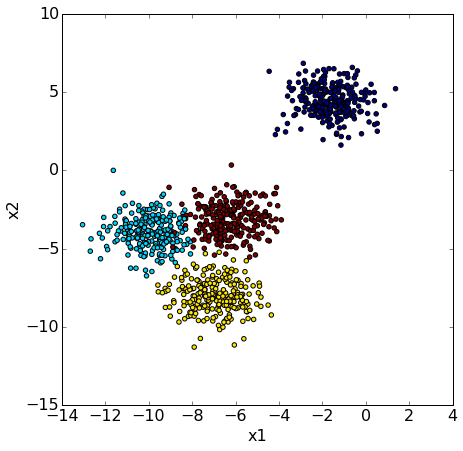

In [16]:
import sklearn.datasets as ds

(X,y) = ds.make_blobs(n_samples=1000,centers=4,random_state=1)
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Let's say we know that there are 4 clusers in the data so we set $k=4$. First we initialize the 4 cluster centroids randomly:

In [17]:
k = 4

import random

random.seed(6)
#random.seed(2)

centroids = []
for i in range(0,k):
    centroids.append([random.randint(-14,4),random.randint(-15,10)])
print centroids

[[1, 6], [-5, -9], [-14, 2], [-6, 4]]


We can then plot these centroids:

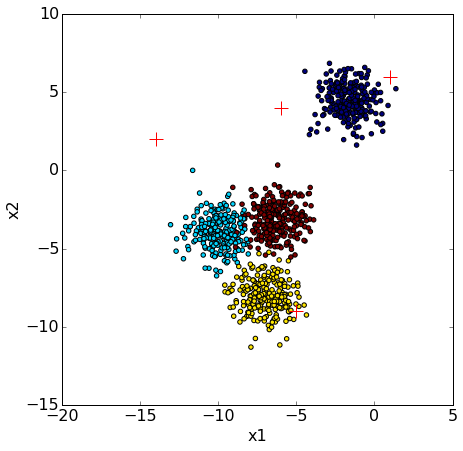

In [18]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.scatter(*np.transpose(centroids), c='r', marker='+', s=200)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Now we have to compute the distance between the centroids and the data points ($|| x_i - \mu_j^{(s)} ||$) to find the closest centroid $\mu_j^{(s)}$ for each data point $x_i$:

$$\text{argmin}_j || x_i - \mu_j^{(s)} ||$$


We can use the function `cdist` from SciPy to calculate the distances from each point to each centroid:

In [19]:
from scipy.spatial.distance import cdist

distances = cdist(centroids, list(zip(X[:,0],X[:,1])))
print distances.shape
print distances

(4L, 1000L)
[[ 14.76263024  15.43958574   2.59325611 ...,   5.46348655   3.99609376
   13.338453  ]
 [  7.88502004   1.50008396  13.94002377 ...,  15.35377826  13.21894598
    8.11125332]
 [  6.38229053  12.71356882  13.20674055 ...,  10.48916048  11.72503581
    6.1943194 ]
 [  8.56108038  11.80751626   5.0076408  ...,   2.80868855   3.5586636
    7.15043603]]


Now, for each column $i$ in *distances* we can find the row $j$ for which the value of that column is smallest. So for each data point $x_i$ we assigined the row number of the closest centroid $\mu_j^{(s)}$:

In [20]:
labels = distances.argmin(axis=0)

[[ 18.98776324  19.51106231   6.82810715 ...,   8.86010399   8.17335363
   17.55822021]
 [ 10.0189369    8.78856997  21.09708506 ...,  21.14824669  19.98571576
   11.31647211]
 [ 13.59041103  13.68035549   2.0362178  ...,   5.93512932   3.44161138
   12.20424441]
 [  9.2279712    3.9920741

We see that column 0 in *distances* is 

[ 14.76263024  15.43958574   2.59325611 ...,   5.46348655   3.99609376
   13.338453  ]
 [  7.88502004   1.50008396  13.94002377 ...,  15.35377826  13.21894598
    8.11125332]
 [  6.38229053  12.71356882  13.20674055 ...,  10.48916048  11.72503581
    6.1943194 ]
 [  8.56108038  11.80751626   5.0076408  ...,   2.80868855   3.5586636
    7.15043603]]

$$[14.76263024,7.88502004,6.38229053,8.56108038]^T$$ 

in which row 2 shows the smallest distance.

We associated each data point with a cluster centroid and plot it with a corresponding color:

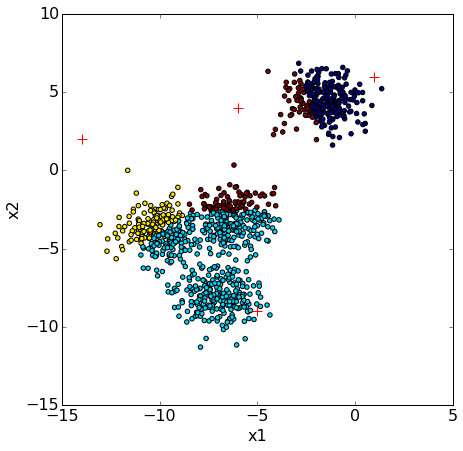

In [21]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(*np.transpose(centroids), c='r', marker='+', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Now we can re-assign the centroid locations based on the means of the current members' locations

$$\mu_j^{(s+1)} = \frac{\sum_{i=1}^n I[c_i = j] x_i}{\sum_{i=1}^n I[c_i = j]}$$

In [22]:
new_centroids = []
for i in range(len(centroids)):
    new_centroids.append([X[:,0][labels==i].mean(), X[:,1][labels==i].mean()])

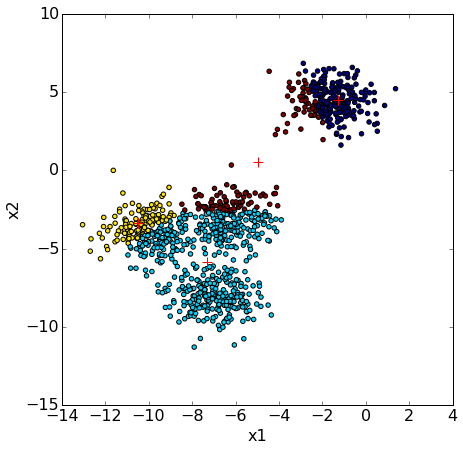

In [23]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(*np.transpose(new_centroids), c='r', marker='+', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

So, we simply iterate these steps until convergence:

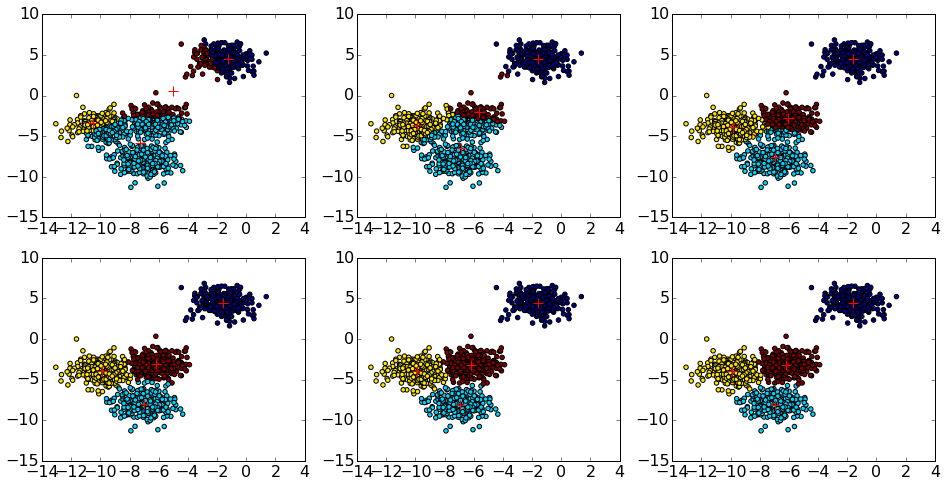

In [24]:
iterations = 6

plt.figure(figsize=(16,8))

for _ in range(iterations):
    plt.subplot(2,3,_+1)
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.scatter(*np.transpose(new_centroids), c='r', marker='+', s=100)
    distances = cdist(new_centroids, list(zip(X[:,0],X[:,1])))
    labels = distances.argmin(axis=0)
    tmp_centroids=[]
    for i in range(len(new_centroids)):
        tmp_centroids.append([X[:,0][labels==i].mean(), X[:,1][labels==i].mean()])
    new_centroids = tmp_centroids
plt.show()

Now, let's do the exercise again with a different random initiation of the centroids (random seed is set to 2 instead of 6). We can see that this time the K-means algorithm fails to converge correctly. So, the solution dies indeed depent on the initial centroids. 

The K-means++ algorithm works the same as K-means but computes a smarter initialization of the centroids. The intuition behind this approach is that spreading out the $k$ initial centroids is a good thing: the first centroid is chosen uniformly at random from the data points that are being clustered, after which each subsequent centroid is chosen from the remaining data points with probability proportional to its squared distance from the point's closest existing centroid.

The `scikit-learn` package includes a `KMeans` class for flexibly fitting K-means models. We can use it perform K-means clustering as follows:

[[-6.20731359 -3.15128342]
 [-1.61415955  4.45930385]
 [-6.98123763 -8.09932345]
 [-9.90492947 -3.93364804]]


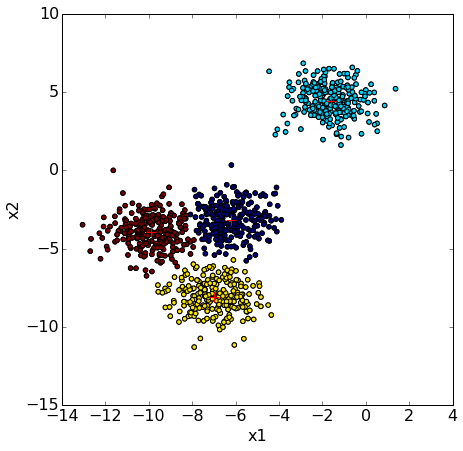

In [25]:
from sklearn.cluster import KMeans
from numpy.random import RandomState

rng = RandomState(1)

(X,y) = ds.make_blobs(n_samples=1000,centers=4,random_state=1)
#(X,y) = ds.make_blobs(n_samples=1000,centers=4,random_state=1,cluster_std=[[1.8,0.1]])
plt.scatter(X[:,0], X[:,1],c=y)

# Instantiate model
kmeans = KMeans(n_clusters=4, random_state=rng)
# Fit model
kmeans.fit(np.transpose((X[:,0],X[:,1])))

print kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(*kmeans.cluster_centers_.T, c='r', marker='+', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

For K-means++ the scale of the features is very important. In the example below we create an artificial data set in which the scale of $x_1$ is much larger than the scale of $x_2$:

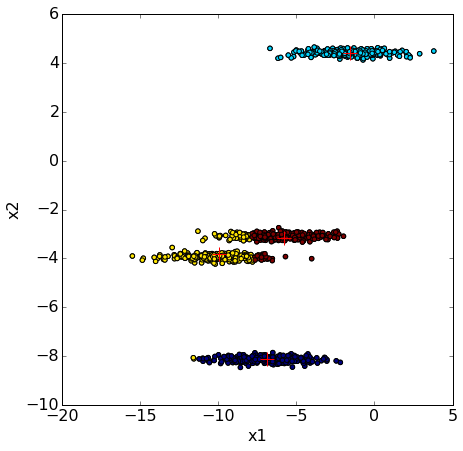

In [47]:
(X,y) = ds.make_blobs(n_samples=1000,centers=4,random_state=1,cluster_std=[[1.8,0.1]])
plt.scatter(X[:,0], X[:,1],c=y-1)

# Instantiate model
kmeans = KMeans(n_clusters=4, random_state=rng)
# Fit model
kmeans.fit(np.transpose((X[:,0],X[:,1])))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(*kmeans.cluster_centers_.T, c='r', marker='+', s=200)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

As you can see K-means++ fails to find the correct clusters. Scaling the features before applying K-means is highly recommended.

In real clustering tasks it is typically not known how many data cluster to expect. In this case we have to choose $k$ based on some criteria. One of those is the **silhouette coefficient** that measures how close various clusters are. A higher silhouette score is better as it means that we don't have too many overlapping clusters.

To compute the silhouette score we first compute two data point properties: **cohesion** and **separation**. The cohesion $a(x)$ of a data point $x$ measures how closely related the points in a cluster are. It is computed as the mean distance between the data point and all other points in the same cluster. Separation measures how well-separated a cluster is from the other features. The separation $b(x)$ of a data point $x$ is computed as the mean distance between the data point and all other points in the next nearest cluster.

The silhouette score $s(x)$ for a data point $x$ is computed as 

$$s(x)=\frac{b(x)-a(x)}{max(a(x),b(x))}.$$

The silhouette coefficient $SC$ for a given clustering of the data points is then computed as 

$$SC = \frac{1}{n}\sum\limits_{i=1}^ns(x).$$

The quality of a clustering can also be measured by the **inertia**. This metric is used to estimate how close the data points in a cluster are (a bit like cohesion discussed above). It is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster center. The intution behind inertia is that clusters with lower inertia are better as it means closely related points form a cluster. 

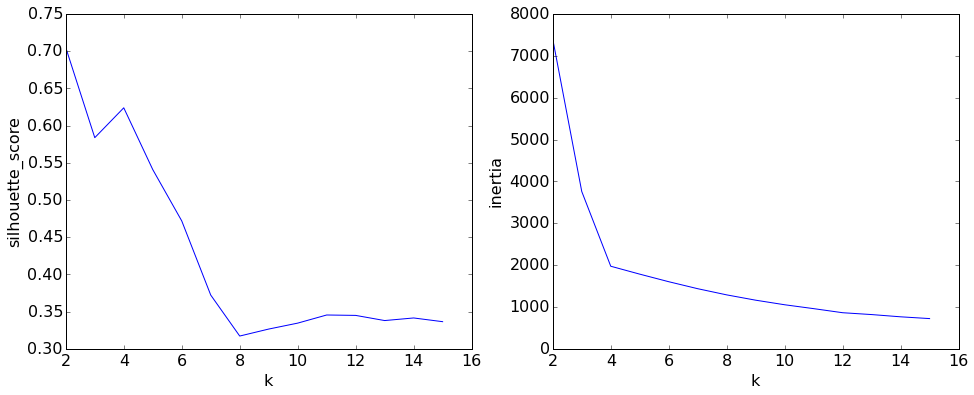

In [28]:
from sklearn import metrics

s_sil = []
s_in = []
for k in range(2,16):
    clf = cluster.KMeans(init='k-means++', n_clusters=k)
    clf.fit(X)
    labels = clf.labels_
    s_sil.append(metrics.silhouette_score(X, labels))
    s_in.append(clf.inertia_)
    
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.plot(range(2,16),s_sil)
plt.subplot(1,2,2)
plt.xlabel('k')
plt.ylabel('inertia')
plt.plot(range(2,16),s_in)
plt.show()

To explain how this works we first load a well known data set in machine learning: the digits dataset (http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits). 

This dataset is made up of 1797 8x8 pixels images. Each image, such as the one below is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

Let's load this data set:

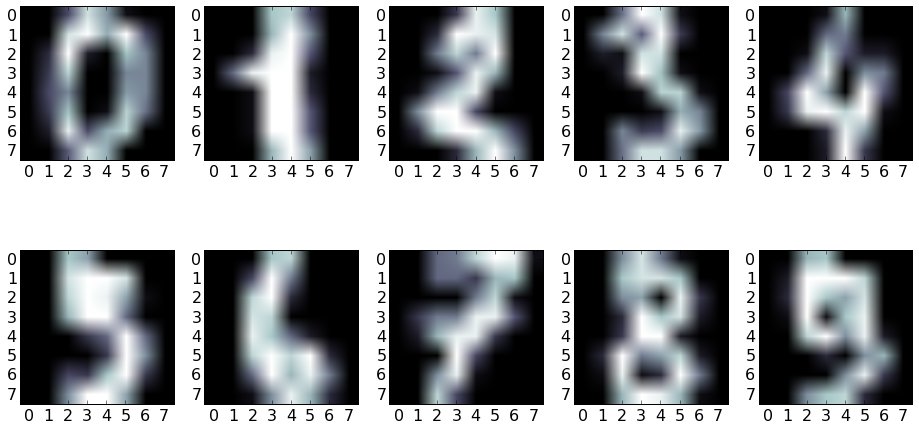

[[ 0.         -0.33501649 -0.04308102 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  1.56568555  1.6951369
  -0.19600752]
 ..., 
 [ 0.         -0.33501649 -0.88456568 ..., -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...,  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...,  0.8876023  -0.26113572
  -0.19600752]]


In [4]:
from sklearn import datasets
from sklearn.preprocessing import scale

#Load the digits dataset
digits = datasets.load_digits()
data = scale(digits.data)

#the first 10 images
plt.figure(figsize=(16,8))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.bone)
plt.show()

#the feature vectors
print data

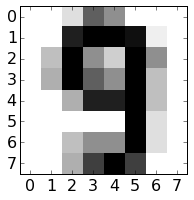

In [5]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

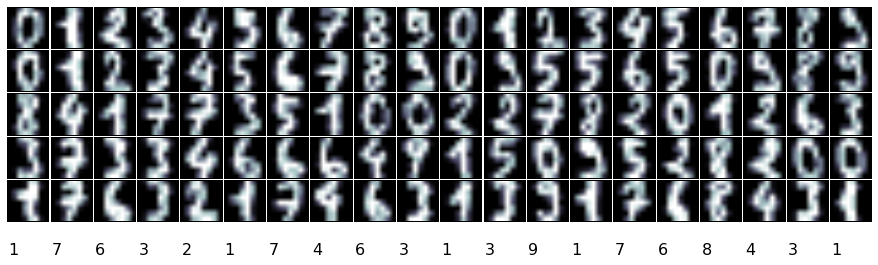

In [6]:
def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
        
print_digits(digits.images, digits.target, max_n=100)        

In [8]:
from sklearn.cross_validation import train_test_split

number_of_instances=digits.images.shape[0]
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images.reshape(number_of_instances,64),test_size=0.25, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

# Reshape images back
images_train=images_train.reshape(images_train.shape[0],8,8)
images_test=images_test.reshape(images_test.shape[0],8,8)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1347, 	 n_features 64


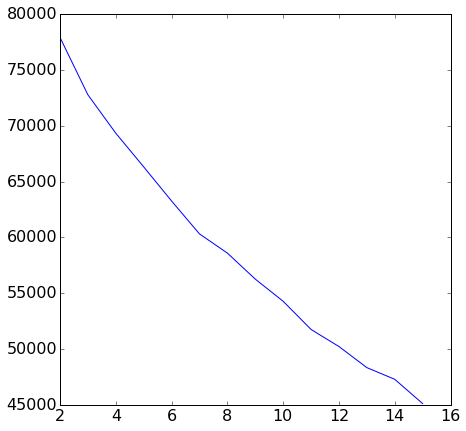

In [12]:
from sklearn import cluster, metrics

s = []
for k in range(2,16):
    clf = cluster.KMeans(init='k-means++', n_clusters=k, random_state=42)
    clf.fit(X_train)
    labels = clf.labels_
    #s.append(metrics.silhouette_score(X_train, labels))
    s.append(clf.inertia_)
    
plt.plot(range(2,16),s)
plt.show()

(1347L,)
[3 2 0 6 8 6 2 3 3]


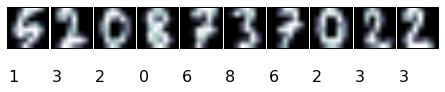

In [18]:
from sklearn import cluster

clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)

print clf.labels_.shape
print clf.labels_[1:10]

print_digits(images_train, clf.labels_, max_n=10)

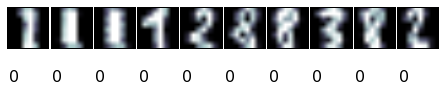

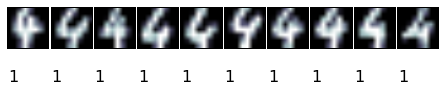

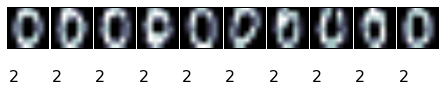

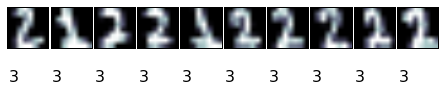

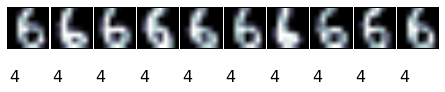

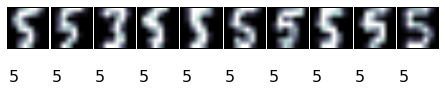

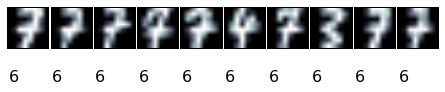

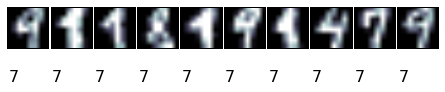

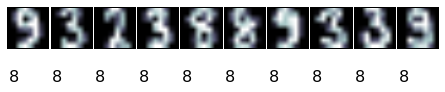

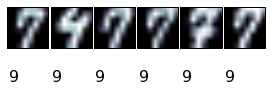

In [19]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

for i in range(10):
     print_cluster(images_test, y_pred, i)